   hadm_id  subject_id  age  item220045  item220739  item223761  item223900  \
0   138082       64336   82         104           1          97           1   
1   149888         806   84          63           4          97           5   
2   164788       22599   69          71           1         100           1   
3   129749       98588  300          88           1          97           1   
4   116394       82736   72          80           2          97           1   
5   103149       25912   80          64           1          98           1   
6   185410       79862   61         102           2          98           2   
7   170506        7908   46         102           1          98           1   
8   199202       31139   61          92           4         100           5   
9   168863       91568   74          71           1          98           1   

   item223901  item226559  item50821  item50882  item50971  item50983  \
0           1         175        328         27          

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.

~~~~~~~~~~~~~~~~~~~~~~~~
0.8447007689735875
DONE
~~~~~~~~~~~~~~~~~~~~~~~~
DONE


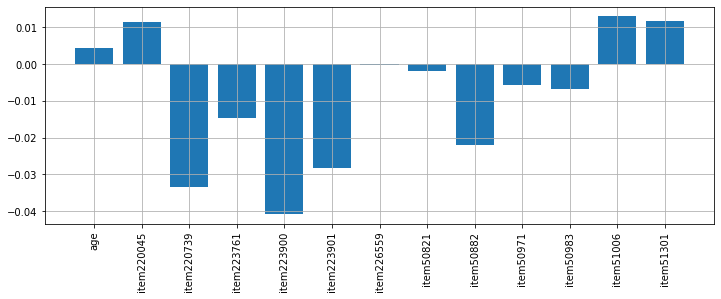

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    skf = StratifiedKFold(n_splits=n_folds, random_state=None, shuffle=shuffle)
    y_pred = y.copy()
    score = 0.0
    count = 0
    for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index],  y.iloc[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        score = score + clf.score(X_test, y_test)
        count += 1
    score = score/count
    return score

data = pd.read_csv('motality_features_1.csv')
#print(data.head(10))

#ad_type = pd.get_dummies(data["admission_type"])
#ad_type['ELECTIVE'] = ad_type['ELECTIVE'].astype('category').cat.codes
#ad_type['EMERGENCY'] = ad_type['ELECTIVE'].astype('category').cat.codes
#ad_type['URGENT'] = ad_type['ELECTIVE'].astype('category').cat.codes
#data = pd.get_dummies(data = data, columns = ["admission_type"])
#data["admission_type_ELECTIVE"] = data["admission_type_ELECTIVE"].astype('category').cat.codes
#data["admission_type_EMERGENCY"] = data["admission_type_EMERGENCY"].astype('category').cat.codes
#data["admission_type_URGENT"] = data["admission_type_URGENT"].astype('category').cat.codes
#data = data[["hadm_id","subject_id","age","admission_type_ELECTIVE","admission_type_EMERGENCY","admission_type_URGENT","item220045","item220739","item223761","item223900","item223901","item226559",
#            "item50821","item50882","item50971","item50983","item51006","item51301","hospital_expire_flag"]]

data = data[["hadm_id","subject_id","age","item220045","item220739","item223761","item223900","item223901","item226559",
            "item50821","item50882","item50971","item50983","item51006","item51301","hospital_expire_flag"]]

print(data.head(10))
print(data[data["hospital_expire_flag"] == True].count() )
train, test = train_test_split(data, test_size=0.2, random_state=733)

X_train, y_train = train.iloc[:, 2:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, 2:-1], test.iloc[:, -1]
feature_names = list(X_train)
print(X_train.head(10))
print(feature_names)

# rescale
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=feature_names)
#X_test = pd.DataFrame(data=scaler.transform(X_test), columns=feature_names)

lr = LogisticRegressionCV().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print(lr_score)
print("DONE")
print("~~~~~~~~~~~~~~~~~~~~~~~~")
plt.rcParams['figure.figsize'] = [12,4]
def explain_logistic_regression(lr, feature_names):
    # --- Write your code below ---
    fig, ax1 = plt.subplots()
    ax1.bar( x = feature_names, height = lr.coef_[0])
    ax1.set_xticklabels(labels = feature_names, rotation=90)
    ax1.grid()
    
# explain the model
explain_logistic_regression(lr, feature_names)
#X, y = data.iloc[:, 2:-1], data.iloc[:, -1]
#gb_score = cv(X, y, LogisticRegression)
#print(gb_score)
#mlp = RandomForestClassifier().fit(X_train, y_train)
#mlp_score = mlp.score(X_test, y_test)
#print(mlp_score)
print("DONE")